# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ModuleNotFoundError: No module named 'matplotlib'

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [3]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In [4]:
#atn
env.reset()
env.P[env.s][0]
env.step(0)
# env.nS
# env.s
# env.start_state_index
# env.P
# env.initial_state_distrib

(36, {'prob': 1})

[(1.0, 24, -1, False)]

D:\Users\anhtu\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(24, -1, False, False, {'prob': 1.0})

In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

    """
    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.

    Adapted from Example 6.6 (page 106) from [Reinforcement Learning: An Introduction
    by Sutton and Barto](http://incompleteideas.net/book/bookdraft2018jan1.pdf).

    With inspiration from:
    [https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py]
    (https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py)

    ### Description
    The board is a 4x12 matrix, with (using NumPy matrix indexing):
    - [3, 0] as the start at bottom-left
    - [3, 11] as the goal at bottom-right
    - [3, 1..10] as the cliff at bottom-center

    If the agent steps on the cliff, it returns to the start.
    An episode terminates when the agent reaches the goal.

    ### Actions
    There are 4 discrete deterministic actions:
    - 0: move up
    - 1: move right
    - 2: move down
    - 3: move left

    ### Observations
    There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal
    (as this results in the end of the episode).
    It remains all the positions of the first 3 rows plus the bottom-left cell.
    The observation is simply the current position encoded as [flattened index](https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html).

    ### Reward
    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.

    ### Arguments

    ```
    gym.make('CliffWalking-v0')
    ```

    ### Version History
    - v0: Initial version release
    """

In [2]:
np.arange(48).reshape(4,12)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [3]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0] 
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt
V_opt[3][0] = -13
V_opt

plot_values(V_opt)

NameError: name 'plot_values' is not defined

In [77]:
env.P[36][3]
env.step(3)

[(1.0, 36, -1, False)]

(36, -100, False, False, {'prob': 1.0})

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

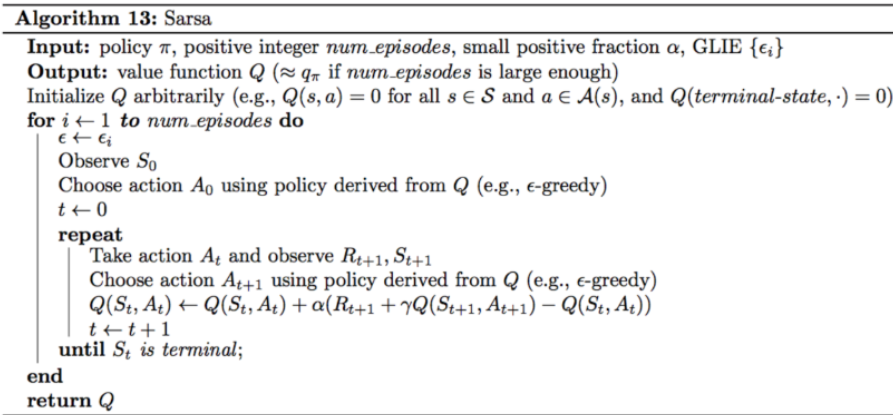

In [128]:
# def update_Q(Qsa, Qsa_next, reward, alpha, gamma):
#     """ updates the action-value function estimate using the most recent time step """
#     return Qsa + (alpha * (reward + (gamma * Qsa_next) - Qsa))

# def epsilon_greedy_probs(env, Q_s, i_episode, eps=None):
#     """ obtains the action probabilities corresponding to epsilon-greedy policy """
#     epsilon = 1.0 / i_episode
#     if eps is not None:
#         epsilon = eps
#     # policy_s = np.ones(env.nA) * epsilon / env.nA
#     # policy_s[np.argmax(Q_s)] = 1 - epsilon + (epsilon / env.nA)

#     policy_s = [1-epsilon+epsilon/env.nA if a == np.argmax(Q_s)\
#              else epsilon/env.nA\
#              for a in np.arange(env.nA) ]
    
#     return policy_s

In [164]:
def sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    nA = env.nA
    nS = env.nS
    Q = defaultdict(lambda: np.zeros(nA))
    # initialize performance monitor
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
                
        ## TODO: complete the function

        epsilon = 1.0/i_episode
        # min_epsilon = 0.5
        # epsilon = max(epsilon, min_epsilon)

        s_t = env.reset()[0]
        
        if all(Q[s_t][a]==0 for a in range(nA)) :
            a_t = np.random.choice(nA)
        else:
            
            probs = [1-epsilon+epsilon/nA if a == np.argmax(Q[s_t])\
                     else epsilon/nA\
                     for a in np.arange(nA) ]
            a_t = np.random.choice(np.arange(nA), p=probs)


        
        while True:
            s_t_plus_1, reward_t_plus_1, is_terminal, _,_ = env.step(a_t)
            if is_terminal:
                Q[s_t][a_t] = Q[s_t][a_t] + (alpha*(reward_t_plus_1 + gamma*0-Q[s_t][a_t]))
                break
                

            if not is_terminal:
                probs = [1-epsilon+epsilon/nA if a == np.argmax(Q[s_t_plus_1])\
                     else epsilon/nA\
                     for a in np.arange(nA) ]
                # policy_s_t_plus_1 = np.ones(nA) * epsilon / nA
                # policy_s_t_plus_1[np.argmax(Q[s_t_plus_1])] = 1 - epsilon + (epsilon / nA)
                a_t_plus_1 = np.random.choice(np.arange(nA), p=probs)
            
                # previousQ_s_t_a_t =  Q[s_t][a_t]
                        
                Q[s_t][a_t] = Q[s_t][a_t] + alpha*(reward_t_plus_1 + gamma*Q[s_t_plus_1][a_t_plus_1]-Q[s_t][a_t])
            

                a_t = a_t_plus_1
                s_t = s_t_plus_1

            
                
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  3  3  1  1  2  1  1  1  0]
 [ 1  0  1  1  1  1  1  2  1  3  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


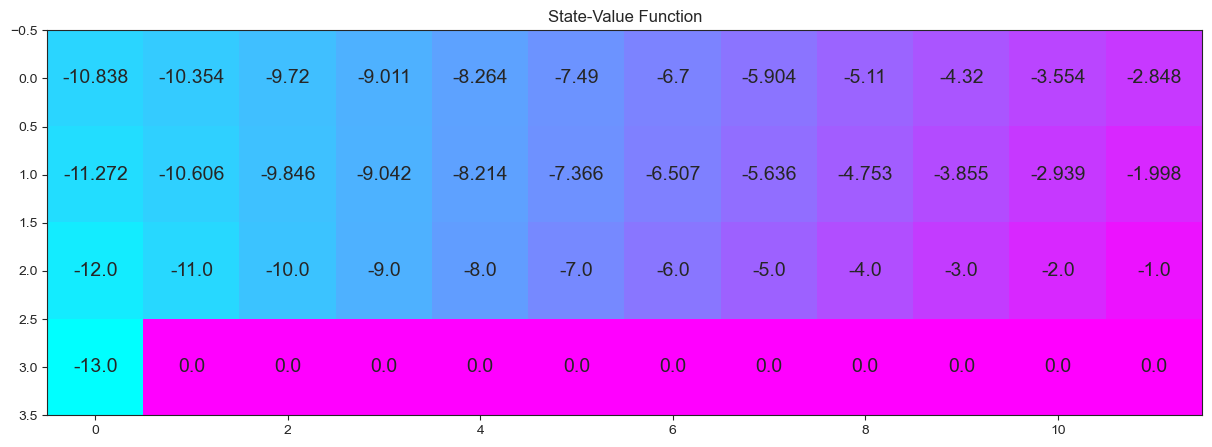

In [165]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 5000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

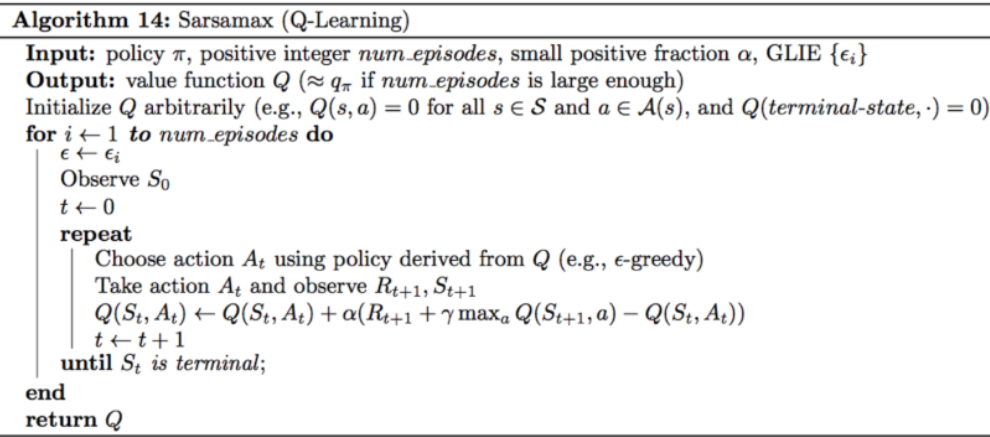

In [6]:
def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    nA = env.nA
    nS = env.nS
    Q = defaultdict(lambda: np.zeros(nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function

        epsilon = 1.0/i_episode
        # min_epsilon = 0.5
        # epsilon = max(epsilon, min_epsilon)

        s_t = env.reset()[0]
        
        if all(Q[s_t][a]==0 for a in range(nA)) :
            a_t = np.random.choice(nA)
        else:
            
            probs = [1-epsilon+epsilon/nA if a == np.argmax(Q[s_t])\
                     else epsilon/nA\
                     for a in np.arange(nA) ]
            a_t = np.random.choice(np.arange(nA), p=probs)


        
        while True:
            s_t_plus_1, reward_t_plus_1, is_terminal, _,_ = env.step(a_t)
            if is_terminal:
                Q[s_t][a_t] = Q[s_t][a_t] + (alpha*(reward_t_plus_1 + gamma*0-Q[s_t][a_t]))
                break
                

            if not is_terminal:
                probs = [1-epsilon+epsilon/nA if a == np.argmax(Q[s_t_plus_1])\
                     else epsilon/nA\
                     for a in np.arange(nA) ]

                a_t_plus_1 = np.random.choice(np.arange(nA), p=probs)
            
                        
                Q[s_t][a_t] = Q[s_t][a_t] + alpha*(reward_t_plus_1 + gamma*max(Q[s_t_plus_1])-Q[s_t][a_t])
            

                a_t = a_t_plus_1
                s_t = s_t_plus_1
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

D:\Users\anhtu\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 5000/5000

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  3  3  3  1  1  1  0  1  2  2  0]
 [ 1  1  1  1  1  1  1  1  2  3  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


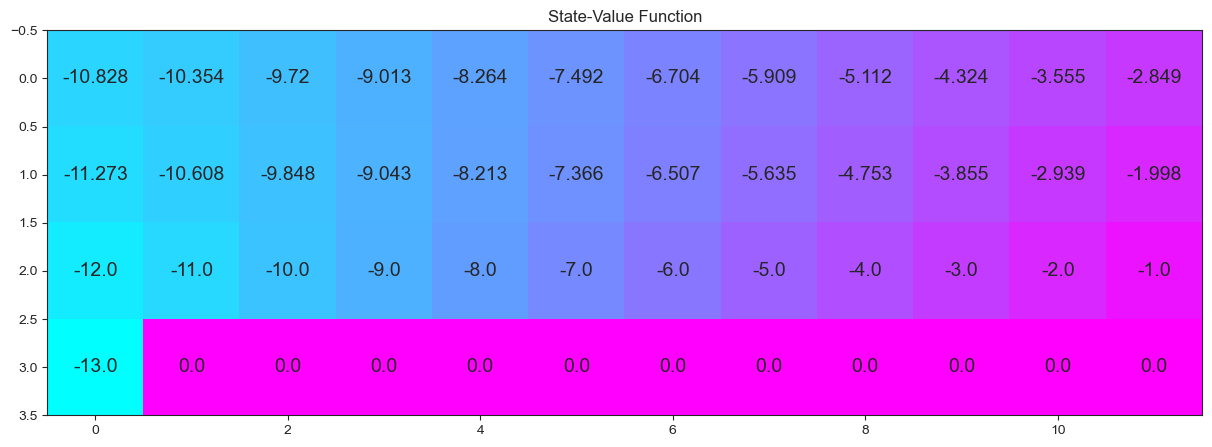

In [7]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)
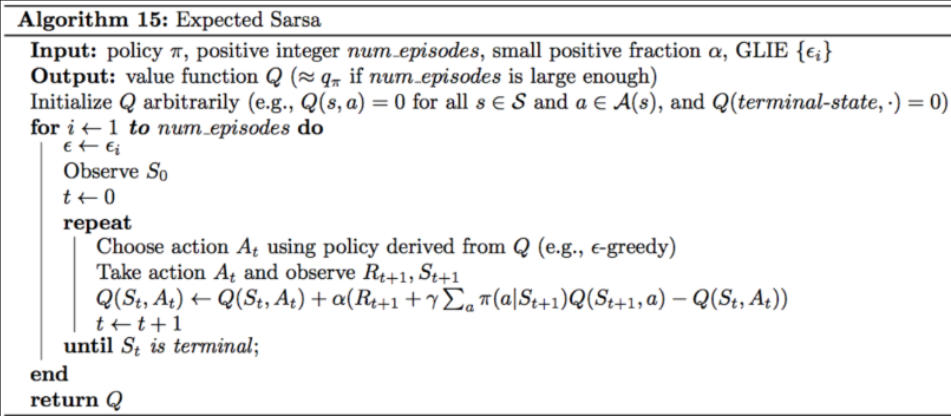

In [8]:
np.mean(np.array([0.4,0.4,0.2])*np.array([3,7,10]))

np.dot(np.array([0.4,0.4,0.2]),np.array([3,7,10]))

In [31]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    nA = env.nA
    nS = env.nS
    Q = defaultdict(lambda: np.zeros(nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        # epsilon = 1.0/i_episode
        epsilon = 0.005
        # min_epsilon = 0.005
        # epsilon = max(epsilon, min_epsilon)

        s_t = env.reset()[0]

        probs = [1-epsilon+epsilon/nA if a == np.argmax(Q[s_t])\
                 else epsilon/nA\
                 for a in np.arange(nA) ]
        
        while True:

            
            if all(Q[s_t][a]==0 for a in range(nA)) :
                a_t = np.random.choice(nA)
            else:                
                a_t = np.random.choice(np.arange(nA), p=probs)
            
            s_t_plus_1, reward_t_plus_1, is_terminal, _,_ = env.step(a_t)
            
            if is_terminal:
                Q[s_t][a_t] = Q[s_t][a_t] + (alpha*(reward_t_plus_1 + gamma*0-Q[s_t][a_t]))
                break
                

            if not is_terminal:
                probs = [1-epsilon+epsilon/nA if a == np.argmax(Q[s_t_plus_1])\
                     else epsilon/nA\
                     for a in np.arange(nA) ]

                # a_t_plus_1 = np.random.choice(np.arange(nA), p=probs)
            
                        
                Q[s_t][a_t] = Q[s_t][a_t] + alpha*(reward_t_plus_1 + gamma*np.dot(Q[s_t_plus_1],probs) -Q[s_t][a_t])
            

                # a_t = a_t_plus_1
                s_t = s_t_plus_1
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  1  1  1  1  1  3]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


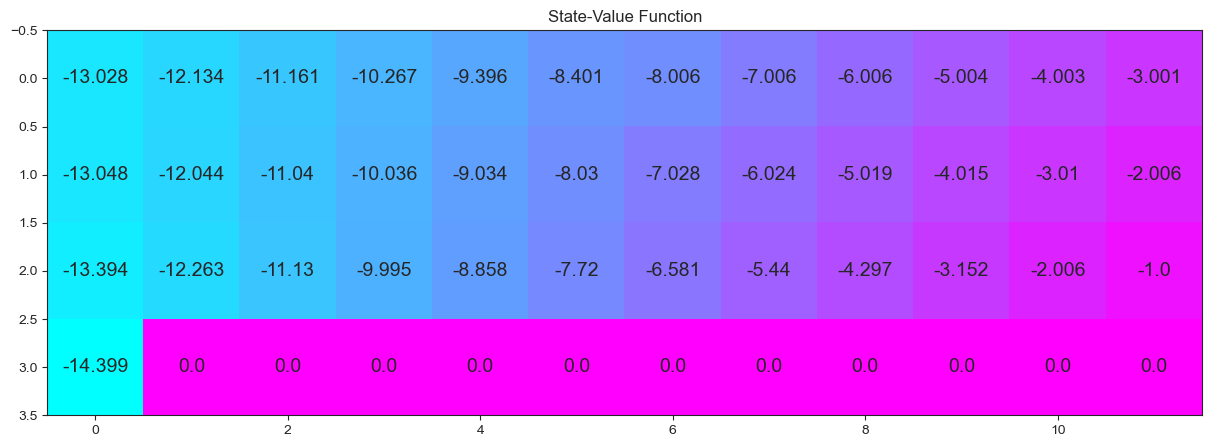

In [32]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 5000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])

In [7]:
print('test')

test
